<h4><b>Problem Statement:</b></h4>
<h5>
We aim to build a binary text classification model using Deep Neural Networks to classify movie reviews
into 'positive' or 'negative', based purely on the review text.
</h5>

<h4><b>Approach:</b></h4>
<h5>
- Load and understand the dataset<br/>
- Preprocess text data (cleaning, tokenization, padding)<br/>
- Build a deep neural network with an embedding layer<br/>
- Train and evaluate the model<br/>
- Test with custom reviews
</h5>

<h4><b>About the Dataset:</b></h4>
<h5>
The dataset is a CSV file with two columns:<br/>
- <b>review</b>: textual review of a movie<br/>
- <b>sentiment</b>: either 'positive' or 'negative'
</h5>

<h4><b>Data Loading</b></h4>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<h4><b>Data Visualization:</b></h4>
<h5>
We check the distribution of sentiments and review lengths.
</h5>

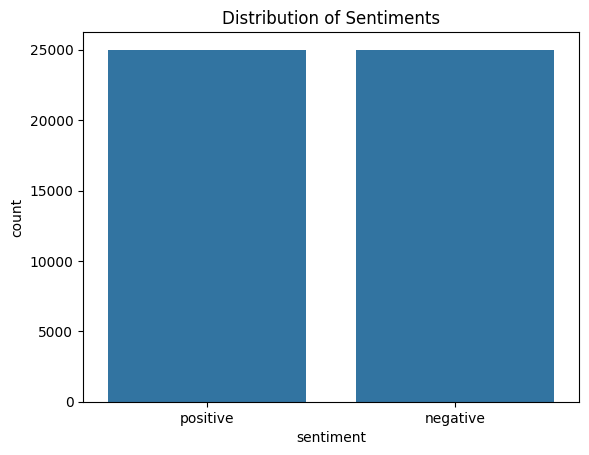

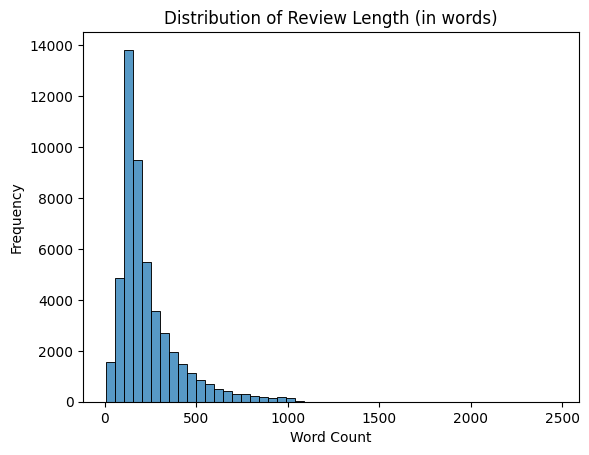

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment count plot
sns.countplot(data=df, x='sentiment')
plt.title("Distribution of Sentiments")
plt.show()

# Word count histogram
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Length (in words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


<h4><b>Data Preprocessing:</b></h4>
<h5>
We convert sentiments to binary, tokenize the text, and pad sequences to uniform length.
</h5>

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-05-03 07:16:38.870754: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 07:16:38.873955: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 07:16:38.881345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746256598.901821    4260 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746256598.906408    4260 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746256598.919046    4260 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [7]:
# Convert labels to binary
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [9]:
# Tokenize and pad
vocab_size = 10000
max_length = 300
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [10]:
actual_vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding/OOV token
print(f"Actual Vocabulary Size: {actual_vocab_size}")

Actual Vocabulary Size: 112282


In [11]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2025-05-03 07:16:47.294698: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [13]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

<h4><b>Model Building:</b></h4>
<h5>
We build a simple DNN model with an Embedding layer followed by Global Average Pooling and Dense layers.
</h5>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

model = Sequential([
    Embedding(input_dim=actual_vocab_size, output_dim=64, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

<h4><b>Model Training & Evaluation:</b></h4>
<h5>
We train the model on training data and evaluate its performance on the validation set.
</h5>

In [16]:
history = model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test), batch_size=32)

Epoch 1/10


2025-05-03 07:17:21.856908: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 48000000 exceeds 10% of free system memory.
2025-05-03 07:17:22.443257: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28744192 exceeds 10% of free system memory.
2025-05-03 07:17:22.502927: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28744192 exceeds 10% of free system memory.
2025-05-03 07:17:22.513634: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28744192 exceeds 10% of free system memory.
2025-05-03 07:17:22.561076: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28744192 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - accuracy: 0.6805 - loss: 0.5674 - val_accuracy: 0.8620 - val_loss: 0.3195
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 28ms/step - accuracy: 0.8787 - loss: 0.3005 - val_accuracy: 0.8661 - val_loss: 0.3014
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - accuracy: 0.9023 - loss: 0.2503 - val_accuracy: 0.8767 - val_loss: 0.2869
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 28ms/step - accuracy: 0.9140 - loss: 0.2289 - val_accuracy: 0.8856 - val_loss: 0.2773
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.9184 - loss: 0.2186 - val_accuracy: 0.8309 - val_loss: 0.3892
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9210 - loss: 0.2080 - val_accuracy: 0.8725 - val_loss: 0.3209
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9255 - loss: 0.2000 - val_accuracy: 0.8884 - val_loss: 0.2865
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9306 - loss: 0.18

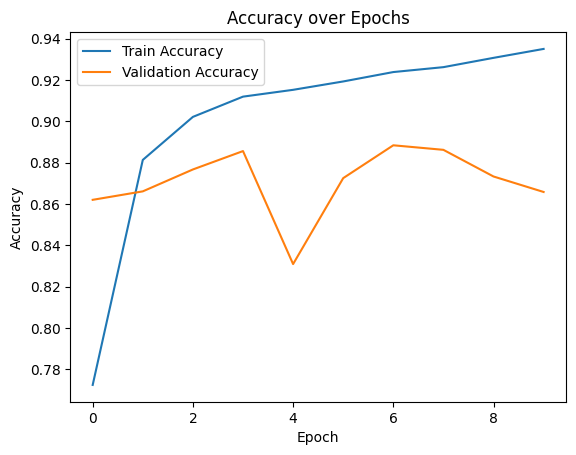

In [17]:
# Plot accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
loss, accuracy = model.evaluate(X_test_pad, y_test)

print("Test Accuracy:", accuracy)

 34/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8604 - loss: 0.3282 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3405
Test Accuracy: 0.8658000230789185


<h4><b>Confusion Matrix and ROC Curve Evaluation:</b></h4>
<h5>We will evaluate the model's performance using two important metrics: Confusion Matrix and ROC Curve.</h5>

  1/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


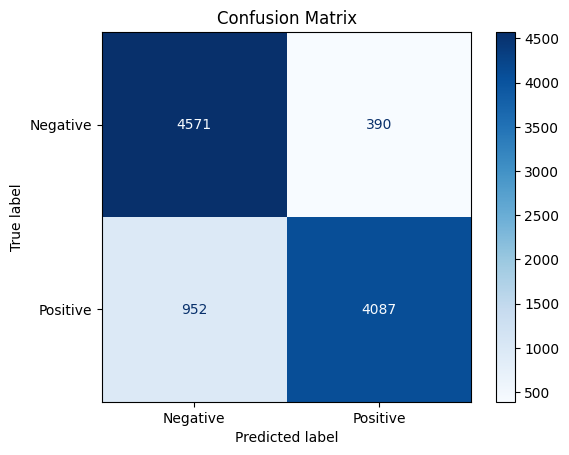

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

y_pred = model.predict(X_test_pad)
y_pred_class = (y_pred > 0.5).astype(int)  

cm = confusion_matrix(y_test, y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

<h4><b>ROC Curve</b></h4>
<h5>The ROC curve shows the tradeoff between the True Positive Rate (TPR) and the False Positive Rate (FPR). The area under the curve (AUC) provides a measure of the model's overall performance. A higher AUC indicates a better model.</h5>


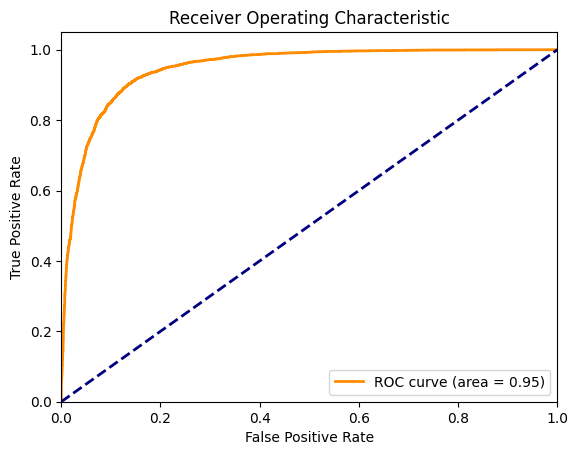

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


<h4><b>Testing with Example:</b></h4>
<h5>
We test the model on a custom movie review to predict its sentiment.
</h5>

In [25]:
def predict_sentiment(review_text):
    seq = tokenizer.texts_to_sequences([review_text])
    pad = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
    pred = model.predict(pad)[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    return f"Predicted Sentiment: {sentiment} (Confidence: {pred:.2f})"

In [43]:
print(predict_sentiment(df['review'][99]))
df['review'][99]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Predicted Sentiment: Positive (Confidence: 1.00)


"I have been a Mario fan for as long as I can remember, I have very fond memories of playing Super Mario World as a kid, this game has brought back many of those memories while adding something new. Super Mario Galaxy is the latest installment in the amazing Mario franchise. There is much very different about this game from any other Mario before it, while still keeping intact the greatest elements of Mario, the first noticeable difference is that the story takes place in space.<br /><br />The story begins much like any other Mario game, Mario receives a letter from Princess Peach inviting him to a celebration at her castle in the Mushroom Kingdom. Upon arriving at Peach's castle Mario finds Bowser and his son (Bowser Jr.) attacking the castle with their airships. Bowser kidnaps Princess Peach and then lifts her castle up into space. In the midst of the castle being lifted into space Mario falls off and lands on an unknown planet. Mario is found by a talking star named Luma and is take

In [45]:
print(predict_sentiment("The movie was waste and useless. I would not recommend it to anyone. It is 0 out of 0"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Sentiment: Negative (Confidence: 0.01)
